In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:

!pip install librosa
#AUDIO FILE


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os

# Define the directory containing your TESS Toronto emotional speech set data
data_dir = r'C:\Users\RITHANYA\OneDrive\Desktop\3rd YEAR\DL PROJECT\archive (10)\TESS Toronto emotional speech set data'

paths = []
labels = []

# file paths and labels
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break

print('Dataset is Loaded')




Dataset is Loaded


In [5]:
len(paths)

2800

In [6]:
paths[:5]

['C:\\Users\\RITHANYA\\OneDrive\\Desktop\\3rd YEAR\\DL PROJECT\\archive (10)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\RITHANYA\\OneDrive\\Desktop\\3rd YEAR\\DL PROJECT\\archive (10)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\RITHANYA\\OneDrive\\Desktop\\3rd YEAR\\DL PROJECT\\archive (10)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\RITHANYA\\OneDrive\\Desktop\\3rd YEAR\\DL PROJECT\\archive (10)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\RITHANYA\\OneDrive\\Desktop\\3rd YEAR\\DL PROJECT\\archive (10)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [7]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [8]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:\Users\RITHANYA\OneDrive\Desktop\3rd YEAR\DL...,angry
1,C:\Users\RITHANYA\OneDrive\Desktop\3rd YEAR\DL...,angry
2,C:\Users\RITHANYA\OneDrive\Desktop\3rd YEAR\DL...,angry
3,C:\Users\RITHANYA\OneDrive\Desktop\3rd YEAR\DL...,angry
4,C:\Users\RITHANYA\OneDrive\Desktop\3rd YEAR\DL...,angry


In [9]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

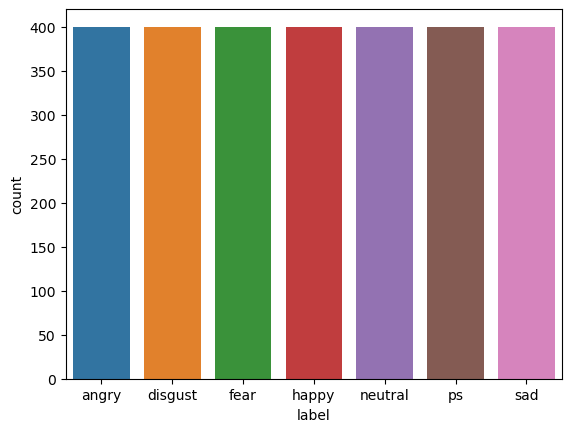

In [10]:
sns.countplot(df['label'])

In [11]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
 # It creates a waveplot to visualize the audio data with a specified emotion label. The librosa.display.waveplot function is used to plot the waveform of the audio data.   
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    
1. `waveplot` creates a time-domain waveform visualization of audio data with emotion labels.

2. `spectrogram` generates a frequency-domain visualization of audio data with emotion labels using a spectrogram.

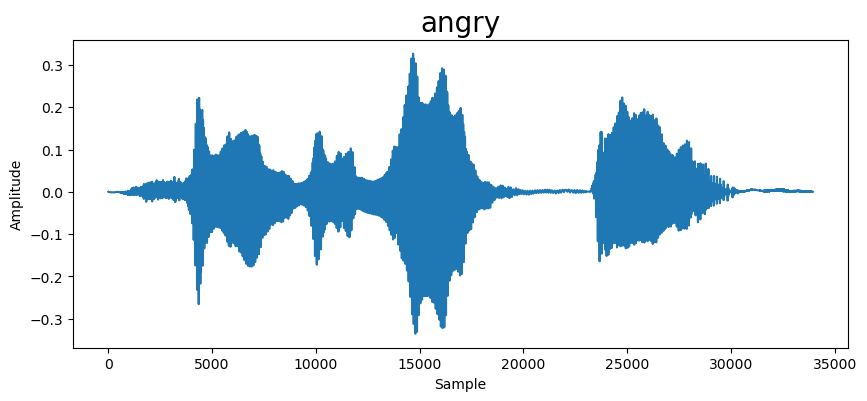

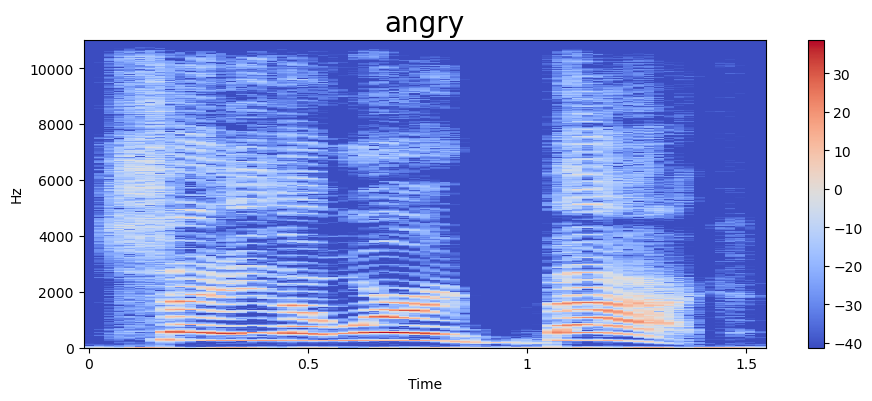

In [12]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()


emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

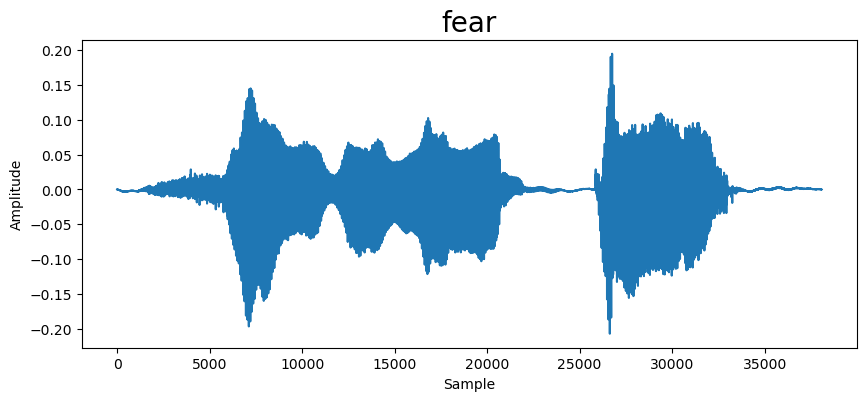

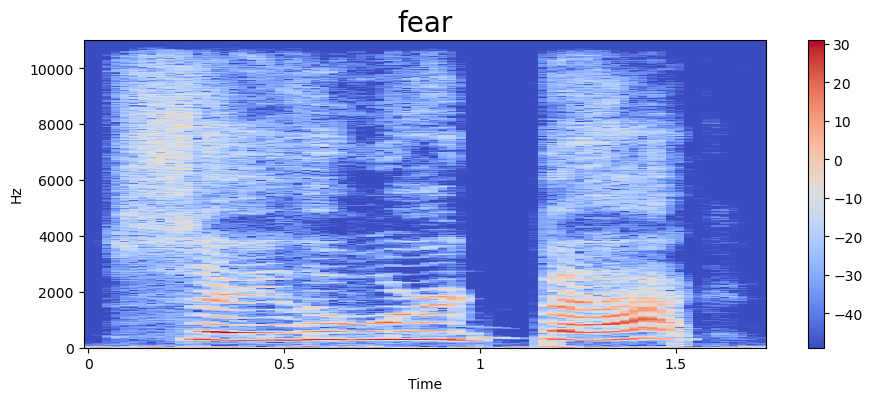

In [13]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

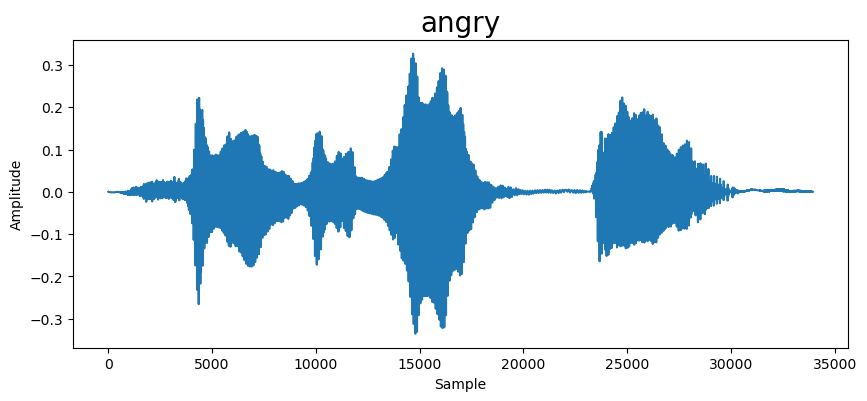

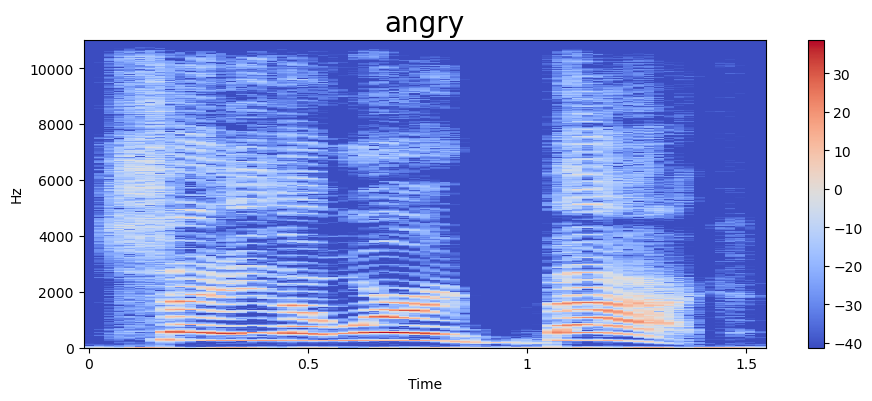

In [14]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()


emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

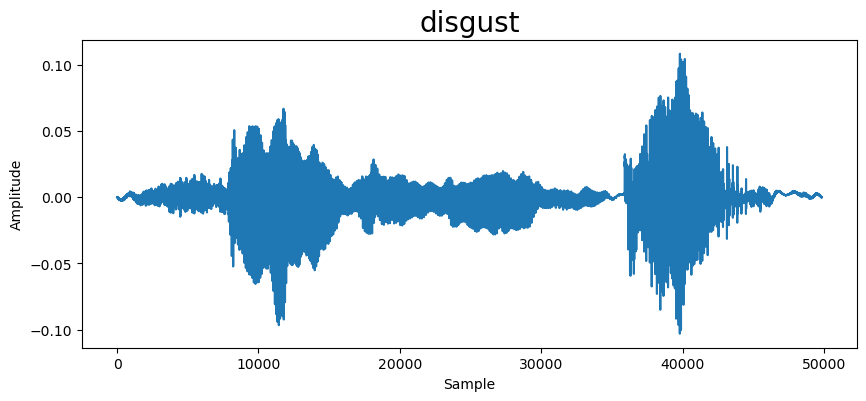

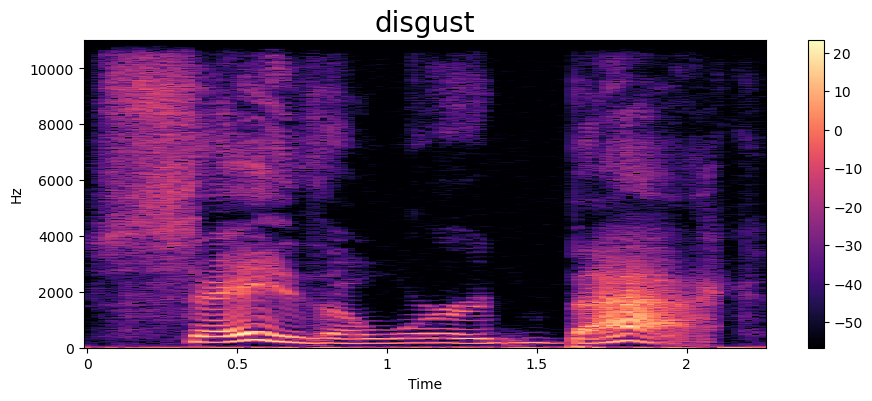

In [15]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

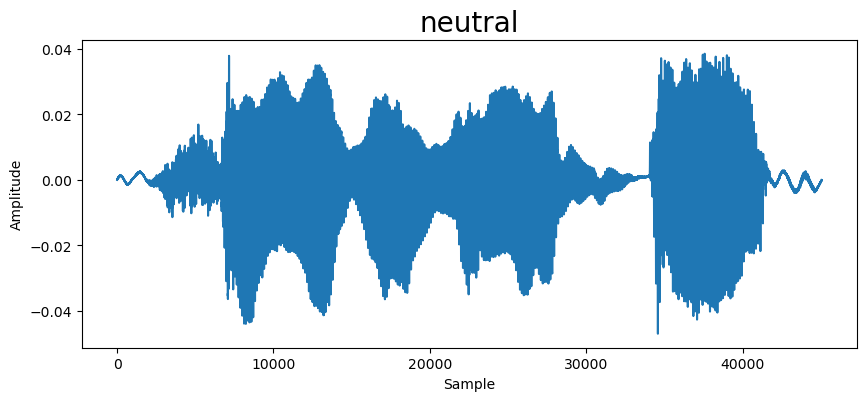

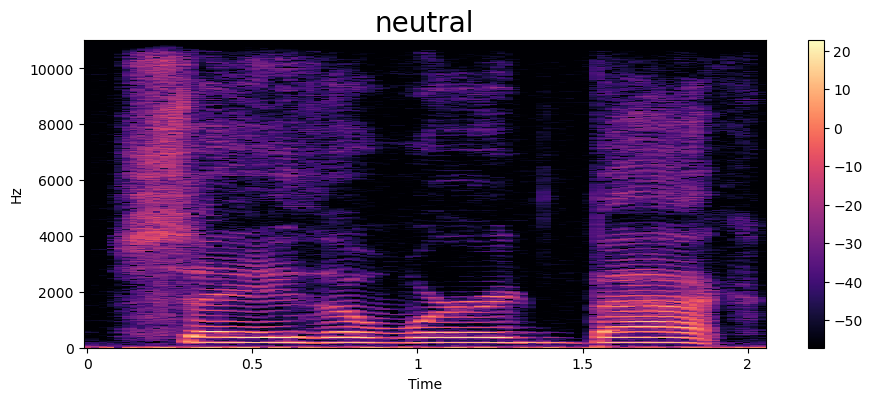

In [16]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

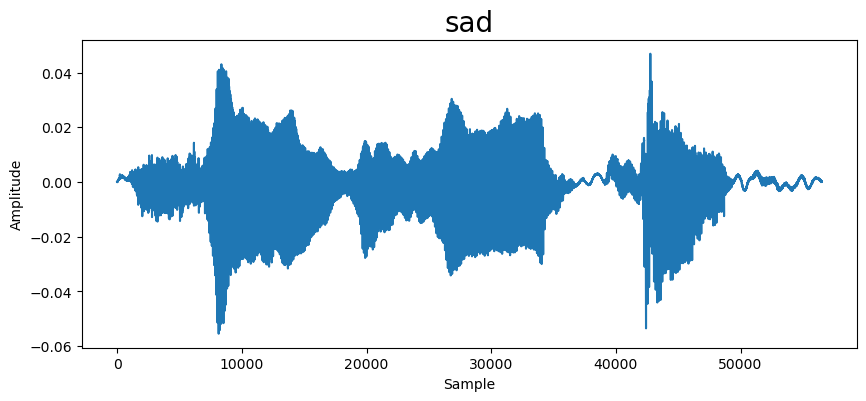

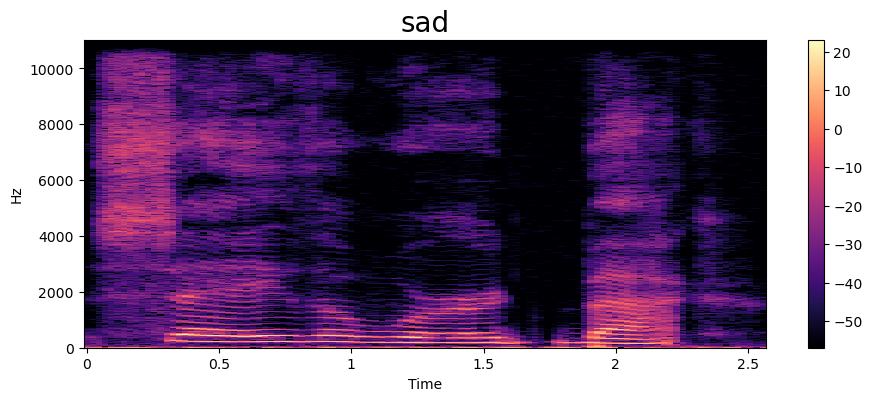

In [17]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

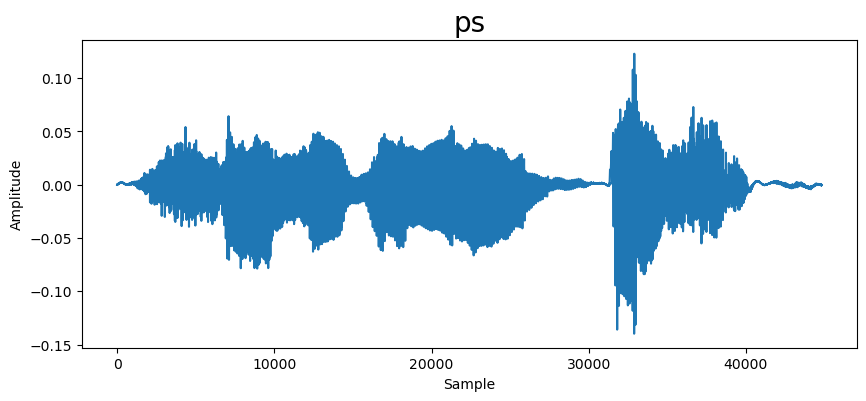

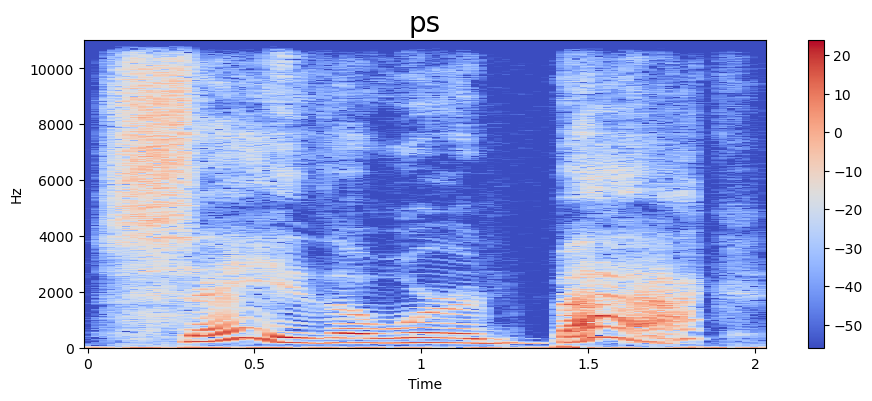

In [18]:
#PLEASANT SURPRISE
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

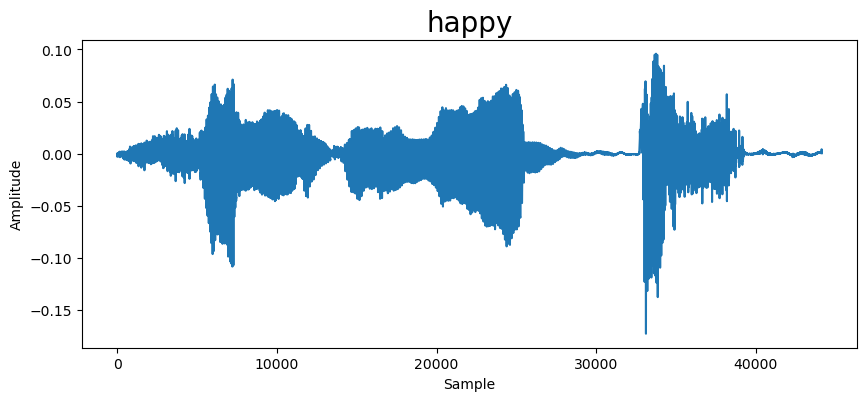

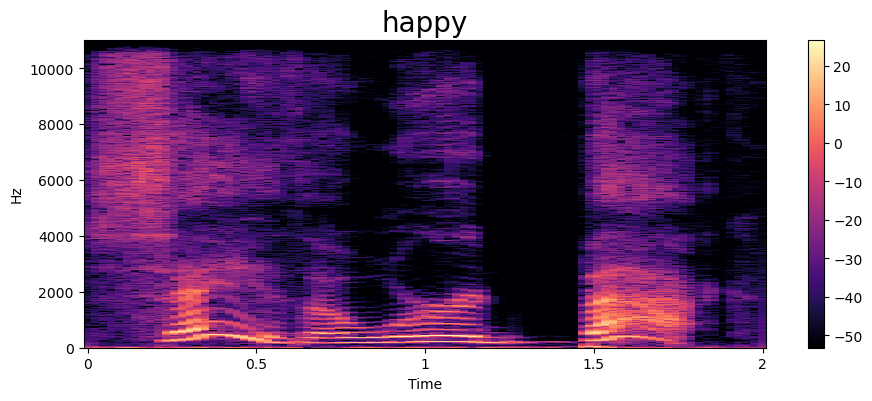

In [19]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [20]:
#FEATURE EXTRACTION
#Mel-frequency cepstral coefficients
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [21]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27551103e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722402e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915043e+00, -1.90649128e+00],
      dtype=float32)

In [22]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x)) 

In [23]:
X_mfcc 

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600896, -32.74544, ...
2       [-429.79196, 46.124, 1.5550478, -0.21709506, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2796    [-589.23676, 96.20408, 36.96118, 15.014448, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.910236, 12.572517, 2...
2799    [-549.2962, 102.374565, 32.268833, 26.261616, ...
Name: speech, Length: 2800, dtype: object

In [24]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

   The NumPy array "X" has a shape of (2800 samples, 40 MFCC coefficients).

(2800, 40)

In [25]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [27]:
y = y.toarray()

In [28]:
y.shape

(2800, 7)

In [29]:

# (Long Short-Term Memorysequential dataemember information from past time steps.
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [30]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=30, batch_size=64)

Epoch 1/30
35/35 [==============================] - 28s 393ms/step - loss: 1.0273 - accuracy: 0.6192 - val_loss: 1.2785 - val_accuracy: 0.3089
Epoch 2/30
35/35 [==============================] - 11s 329ms/step - loss: 0.4033 - accuracy: 0.8683 - val_loss: 0.3292 - val_accuracy: 0.8857
Epoch 3/30
35/35 [==============================] - 11s 328ms/step - loss: 0.2039 - accuracy: 0.9424 - val_loss: 0.0507 - val_accuracy: 0.9893
Epoch 4/30
35/35 [==============================] - 10s 300ms/step - loss: 0.1421 - accuracy: 0.9580 - val_loss: 0.1355 - val_accuracy: 0.9554
Epoch 5/30
35/35 [==============================] - 11s 304ms/step - loss: 0.1287 - accuracy: 0.9589 - val_loss: 0.1023 - val_accuracy: 0.9554
Epoch 6/30
35/35 [==============================] - 11s 320ms/step - loss: 0.0804 - accuracy: 0.9754 - val_loss: 0.0885 - val_accuracy: 0.9696
Epoch 7/30
35/35 [==============================] - 11s 328ms/step - loss: 0.1009 - accuracy: 0.9696 - val_loss: 0.5163 - val_accuracy: 0.8536

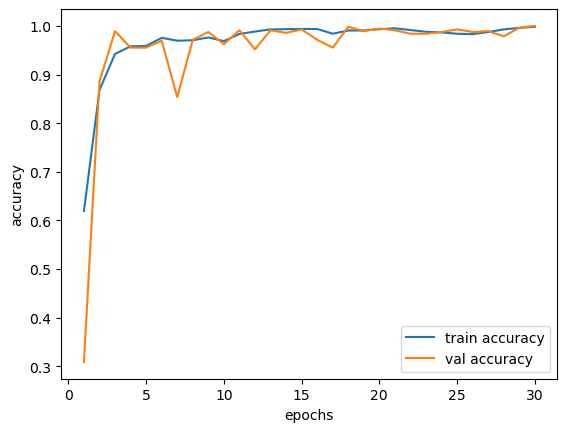

In [33]:
epochs = list(range(1, 31))  # Adjust the range to match the number of epochs you ran
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


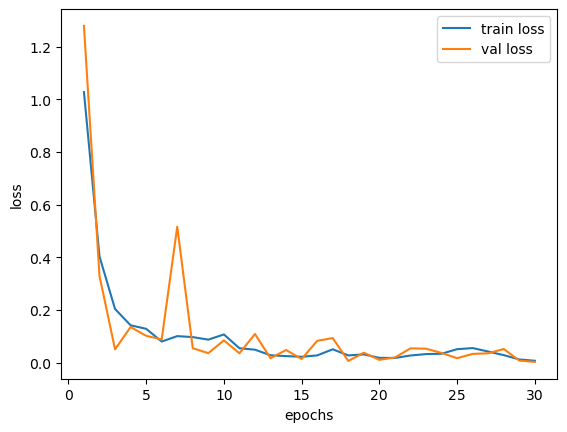

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [40]:
# Assuming you have X_train (features) and y_train (labels) for your training data

# Define the number of epochs and batch size
epochs = 30  # Adjust the number of epochs as needed
batch_size = 64  # Adjust the batch size as needed

# Train the CNN model
history = cnn_model.fit(X, y, validation_split=0.2, epochs=epochs, batch_size=batch_size)


Epoch 1/30
35/35 [==============================] - 9s 68ms/step - loss: 2.8587 - accuracy: 0.4750 - val_loss: 0.7640 - val_accuracy: 0.6982
Epoch 2/30
35/35 [==============================] - 1s 28ms/step - loss: 0.4096 - accuracy: 0.8567 - val_loss: 0.2679 - val_accuracy: 0.9107
Epoch 3/30
35/35 [==============================] - 1s 23ms/step - loss: 0.2040 - accuracy: 0.9362 - val_loss: 0.1085 - val_accuracy: 0.9625
Epoch 4/30
35/35 [==============================] - 1s 27ms/step - loss: 0.1367 - accuracy: 0.9607 - val_loss: 0.0649 - val_accuracy: 0.9786
Epoch 5/30
35/35 [==============================] - 1s 23ms/step - loss: 0.0924 - accuracy: 0.9692 - val_loss: 0.1395 - val_accuracy: 0.9339
Epoch 6/30
35/35 [==============================] - 1s 27ms/step - loss: 0.0835 - accuracy: 0.9741 - val_loss: 0.0275 - val_accuracy: 0.9964
Epoch 7/30
35/35 [==============================] - 1s 23ms/step - loss: 0.0592 - accuracy: 0.9826 - val_loss: 0.0270 - val_accuracy: 0.9911
Epoch 8/30
35

In [41]:
from keras.layers import GRU

rnn_model = Sequential([
    GRU(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [42]:
# Assuming you have X_train (features) and y_train (labels) for your training data

# Define the number of epochs and batch size
epochs = 30  # Adjust the number of epochs as needed
batch_size = 64  # Adjust the batch size as needed

# Train the RNN model
history = rnn_model.fit(X, y, validation_split=0.2, epochs=epochs, batch_size=batch_size)


Epoch 1/30
35/35 [==============================] - 22s 277ms/step - loss: 1.2984 - accuracy: 0.5371 - val_loss: 1.2772 - val_accuracy: 0.3321
Epoch 2/30
35/35 [==============================] - 6s 180ms/step - loss: 0.6859 - accuracy: 0.7379 - val_loss: 0.9356 - val_accuracy: 0.4143
Epoch 3/30
35/35 [==============================] - 7s 207ms/step - loss: 0.4747 - accuracy: 0.8179 - val_loss: 0.7878 - val_accuracy: 0.6929
Epoch 4/30
35/35 [==============================] - 8s 224ms/step - loss: 0.3845 - accuracy: 0.8679 - val_loss: 0.7405 - val_accuracy: 0.7536
Epoch 5/30
35/35 [==============================] - 8s 219ms/step - loss: 0.2684 - accuracy: 0.9129 - val_loss: 0.2802 - val_accuracy: 0.9071
Epoch 6/30
35/35 [==============================] - 7s 206ms/step - loss: 0.1551 - accuracy: 0.9513 - val_loss: 0.2684 - val_accuracy: 0.9054
Epoch 7/30
35/35 [==============================] - 7s 195ms/step - loss: 0.1282 - accuracy: 0.9585 - val_loss: 0.1439 - val_accuracy: 0.9518
Epoch

In [ ]:
CNN (Convolutional Neural Network): Your model includes Conv1D layers, which are typically used for processing sequential data. However, CNNs can also be used for spatial data, such as images, by using 2D convolutional layers.

RNN (Recurrent Neural Network): You have an LSTM model in your code, which is specifically designed for handling sequential data. It's well-suited for tasks like natural language processing, speech recognition, and time series analysis.